In [63]:
import numpy as np

from data import *

import soundfile as sf

from scipy import signal, stats

from scipy.io import wavfile 

import matplotlib.pyplot as plt


vocales = ["a.wav", "e.wav", "i.wav", "o.wav", "u.wav"]
consonantes = ["f.wav", "j.wav", "s.wav", "sh.wav"]
audios = []
recortados = []
colores1 = ["#03045E", "#0077B6", "#00B4D8", "#90E0EF", "#CAF0F8"]
colores2 = ["#BFB5AF", "#ECE2D0", "#D5B9B2", "#A26769", "#582C4D"]
colores3 = ["#CAA8F5", "#9984D4", "#592E83", "#230C33"]
print(coef_b, coef_a)

frec = 14700
N = int(0.2 * frec)  # 200 ms

def guardar_señal(señal):
    audio, _ = sf.read(señal)
    audios.append(audio)
    audio_recortado = audio[:N]
    recortados.append(audio_recortado)


    
for vocal in vocales:
    guardar_señal(vocal)
for consonante in consonantes:
    guardar_señal(consonante)



{'a': [0.0311], 'e': [0.0321], 'i': [0.0121], 'o': [0.0073], 'u': [0.00258], 's': [0.0251], 'sh': [0.0302], 'f': [0.0453], 'j': [0.0245]} {'a': [1.1835, -0.5685, 0.3874, 0.2939, -0.9807, 0.587, -0.2441, -0.0866, 0.4763, -0.0491, -0.1137, 0.0601, -0.4138, 0.2613, 0.1998, -0.0327, 0.0894, -0.195, -0.0695, 0.01], 'e': [0.3876, -0.8134, 1.126, 0.3371, 0.7794, 0.413, -0.6026, -0.4977, -0.9342, -0.3311, -0.0233, 0.3248, 0.388, 0.4025, 0.0977, -0.0062, -0.0465, -0.1614, -0.0132, -0.1101], 'i': [-0.2189, -0.6421, 1.3317, 1.3899, 1.6527, 0.3503, -1.0505, -1.8235, -1.6228, -0.5322, 0.3435, 0.9051, 0.7906, 0.3556, 0.2841, -0.164, 0.084, -0.2809, -0.0976, -0.1635], 'o': [1.2328, -0.6982, 1.4335, -0.4589, 0.3123, -1.1168, -0.6169, -0.1906, 0.5552, 0.5243, 0.8605, -0.0488, -0.3003, -0.855, -0.1109, -0.0894, 0.5002, 0.0034, 0.3986, -0.386], 'u': [0.735, 0.3731, 0.5123, 1.0994, -1.1137, -1.1504, -0.3682, -0.3828, 0.7703, 0.8673, 0.2769, -0.198, -0.1659, -0.3783, -0.1847, 0.1825, 0.1184, -0.0033, 0.123

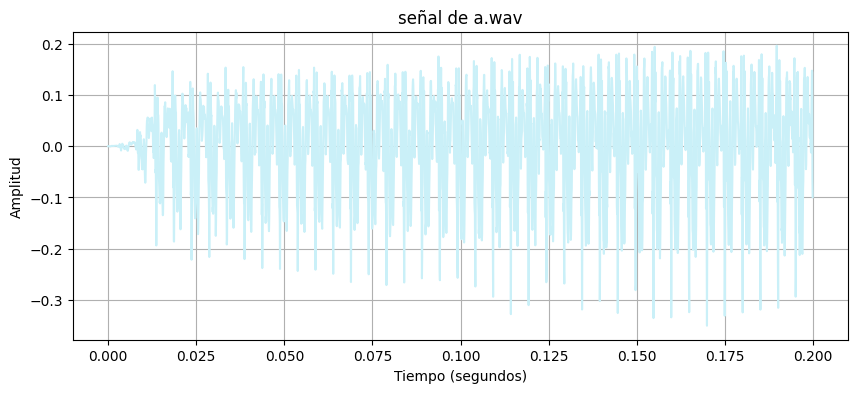

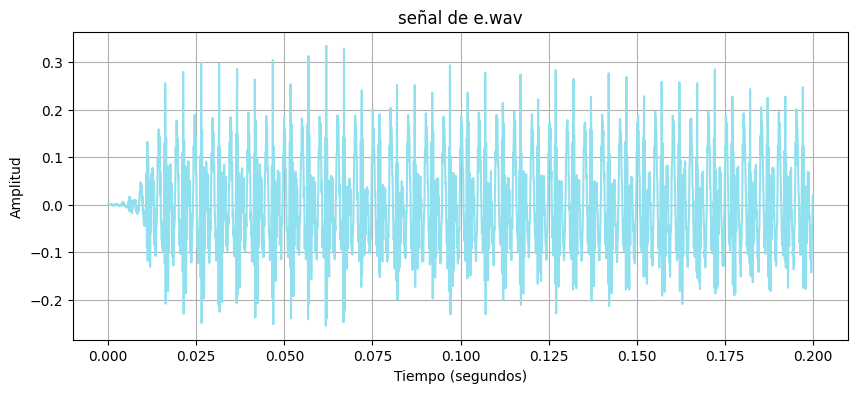

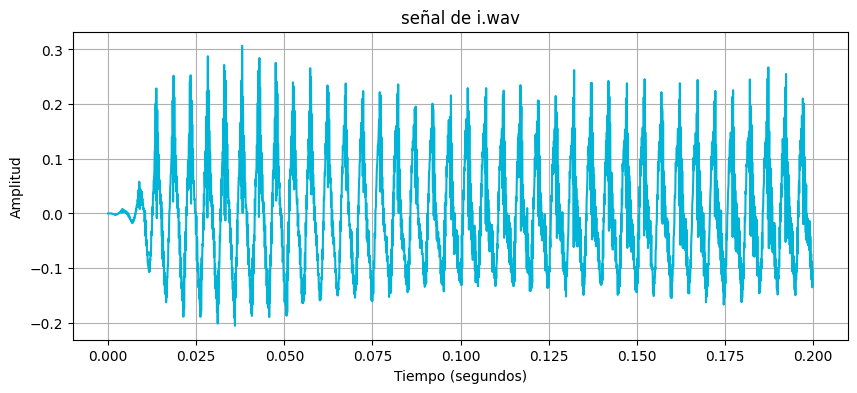

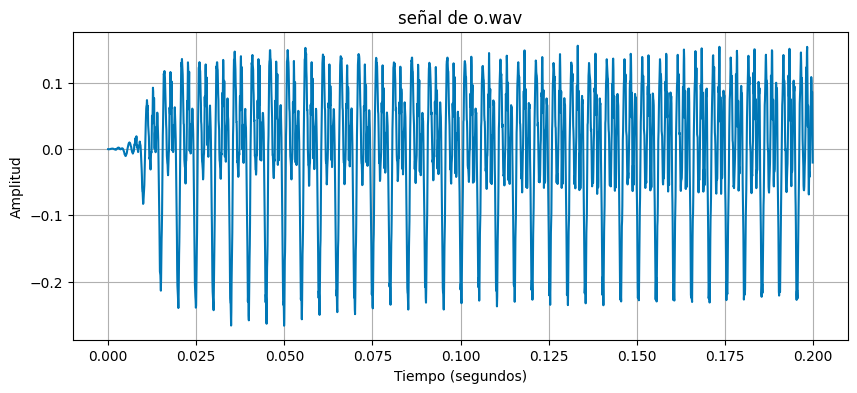

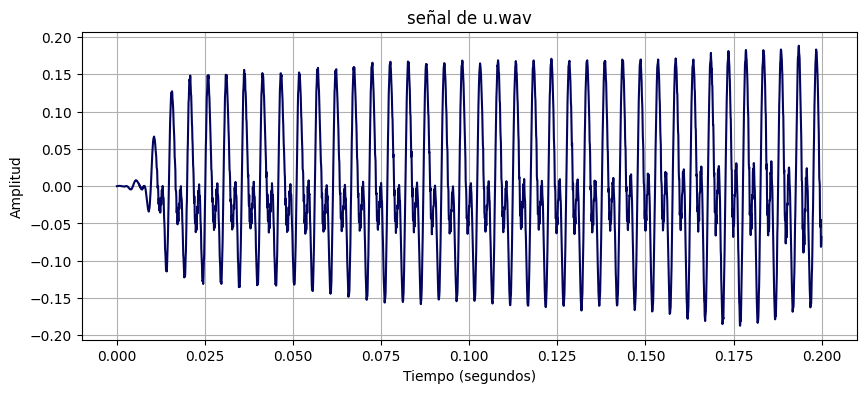

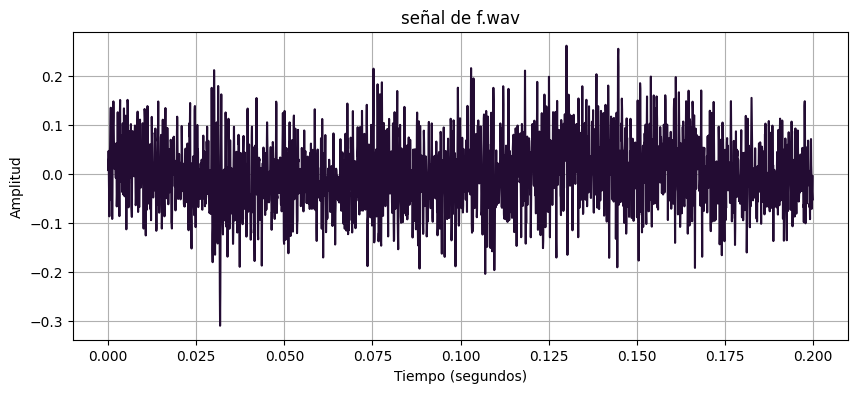

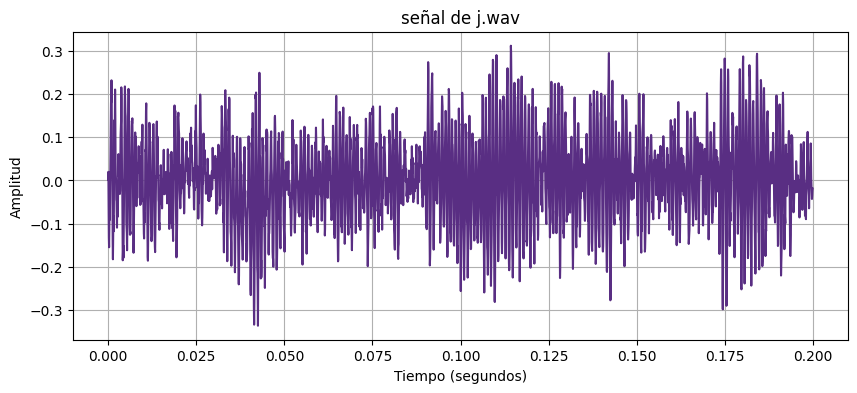

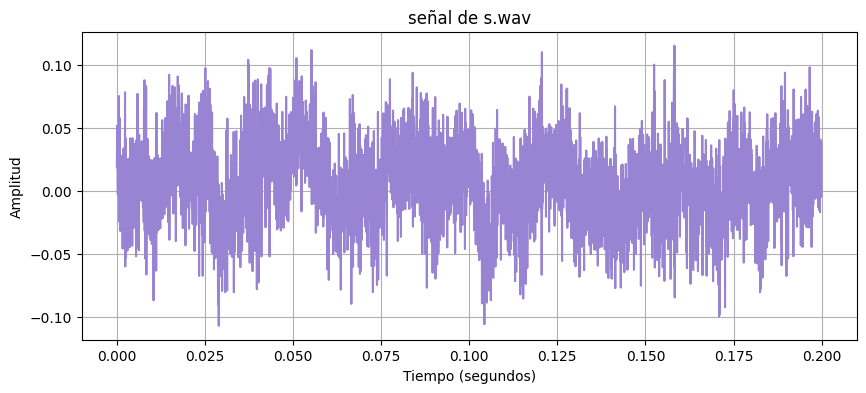

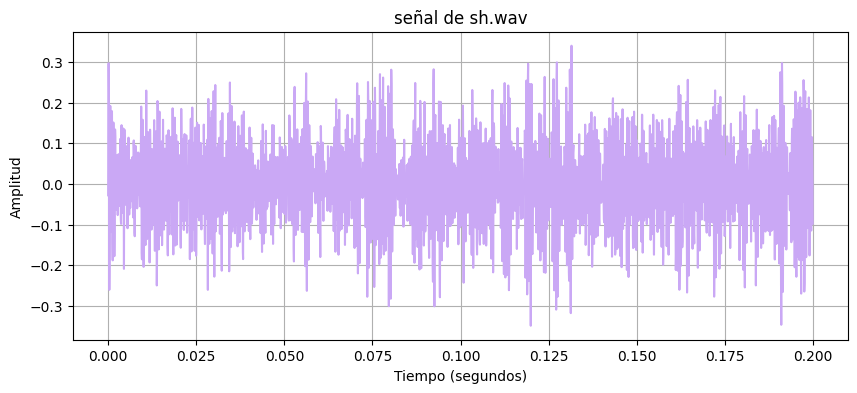

{'a': [0.0311], 'e': [0.0321], 'i': [0.0121], 'o': [0.0073], 'u': [0.00258], 's': [0.0251], 'sh': [0.0302], 'f': [0.0453], 'j': [0.0245]} {'a': [1.1835, -0.5685, 0.3874, 0.2939, -0.9807, 0.587, -0.2441, -0.0866, 0.4763, -0.0491, -0.1137, 0.0601, -0.4138, 0.2613, 0.1998, -0.0327, 0.0894, -0.195, -0.0695, 0.01], 'e': [0.3876, -0.8134, 1.126, 0.3371, 0.7794, 0.413, -0.6026, -0.4977, -0.9342, -0.3311, -0.0233, 0.3248, 0.388, 0.4025, 0.0977, -0.0062, -0.0465, -0.1614, -0.0132, -0.1101], 'i': [-0.2189, -0.6421, 1.3317, 1.3899, 1.6527, 0.3503, -1.0505, -1.8235, -1.6228, -0.5322, 0.3435, 0.9051, 0.7906, 0.3556, 0.2841, -0.164, 0.084, -0.2809, -0.0976, -0.1635], 'o': [1.2328, -0.6982, 1.4335, -0.4589, 0.3123, -1.1168, -0.6169, -0.1906, 0.5552, 0.5243, 0.8605, -0.0488, -0.3003, -0.855, -0.1109, -0.0894, 0.5002, 0.0034, 0.3986, -0.386], 'u': [0.735, 0.3731, 0.5123, 1.0994, -1.1137, -1.1504, -0.3682, -0.3828, 0.7703, 0.8673, 0.2769, -0.198, -0.1659, -0.3783, -0.1847, 0.1825, 0.1184, -0.0033, 0.123

In [51]:
def graficar_señal(audio_recortado, color, nombre):
    tiempo = np.arange(0, N) / frec

    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, audio_recortado, color=color)
    plt.title(f"señal de {nombre}")
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

colores1 = colores1[::-1]
for i, vocal in enumerate(vocales):
    graficar_señal(recortados[i], colores1[i], vocal)

colores3 = colores3[::-1]
for i, consonante in enumerate(consonantes):
    graficar_señal(recortados[i + len(vocales)], colores3[i], consonante)
print(coef_b, coef_a)

    
    

In [52]:
from scipy import signal
autocorrelaciones = []
lags_var = []

def calcular_autocorrelacion(audio_recortado):
    n = len(audio_recortado)

    autocorr = signal.correlate(audio_recortado, audio_recortado, mode='full')


    autocorrelaciones.append(autocorr)
    lags = np.arange(-len(audio_recortado)+1, len(audio_recortado))
    lags_var.append(lags)

for audio_recortado in recortados:
    calcular_autocorrelacion(audio_recortado)

print(coef_b, coef_a)

{'a': [0.0311], 'e': [0.0321], 'i': [0.0121], 'o': [0.0073], 'u': [0.00258], 's': [0.0251], 'sh': [0.0302], 'f': [0.0453], 'j': [0.0245]} {'a': [1.1835, -0.5685, 0.3874, 0.2939, -0.9807, 0.587, -0.2441, -0.0866, 0.4763, -0.0491, -0.1137, 0.0601, -0.4138, 0.2613, 0.1998, -0.0327, 0.0894, -0.195, -0.0695, 0.01], 'e': [0.3876, -0.8134, 1.126, 0.3371, 0.7794, 0.413, -0.6026, -0.4977, -0.9342, -0.3311, -0.0233, 0.3248, 0.388, 0.4025, 0.0977, -0.0062, -0.0465, -0.1614, -0.0132, -0.1101], 'i': [-0.2189, -0.6421, 1.3317, 1.3899, 1.6527, 0.3503, -1.0505, -1.8235, -1.6228, -0.5322, 0.3435, 0.9051, 0.7906, 0.3556, 0.2841, -0.164, 0.084, -0.2809, -0.0976, -0.1635], 'o': [1.2328, -0.6982, 1.4335, -0.4589, 0.3123, -1.1168, -0.6169, -0.1906, 0.5552, 0.5243, 0.8605, -0.0488, -0.3003, -0.855, -0.1109, -0.0894, 0.5002, 0.0034, 0.3986, -0.386], 'u': [0.735, 0.3731, 0.5123, 1.0994, -1.1137, -1.1504, -0.3682, -0.3828, 0.7703, 0.8673, 0.2769, -0.198, -0.1659, -0.3783, -0.1847, 0.1825, 0.1184, -0.0033, 0.123

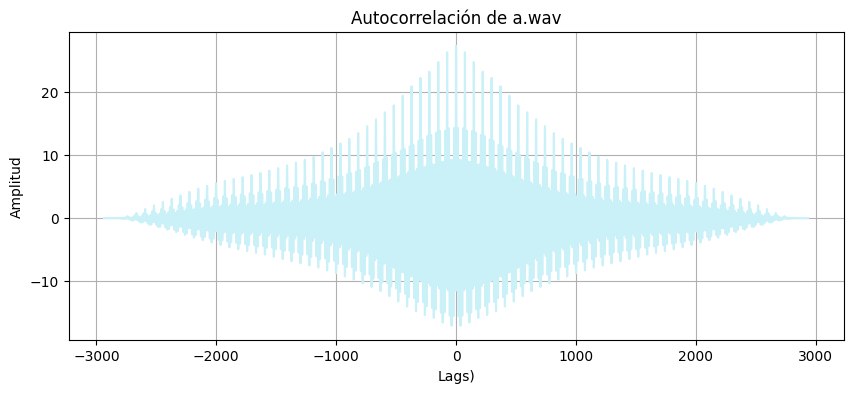

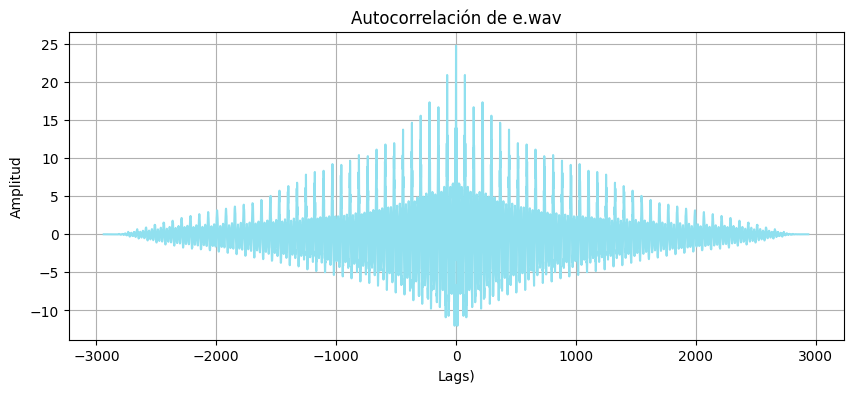

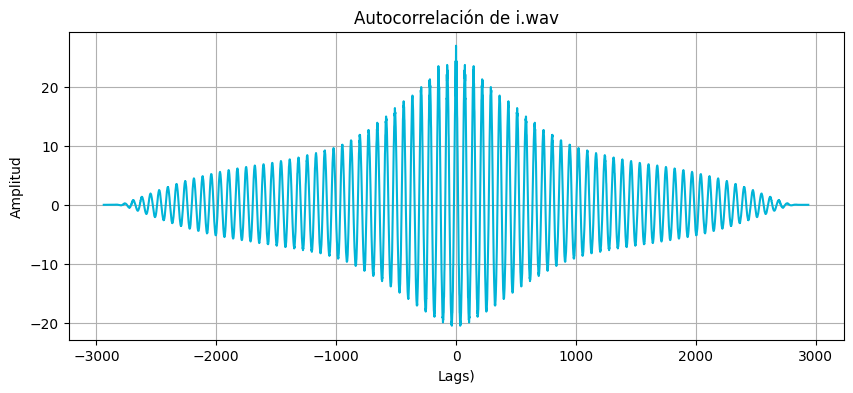

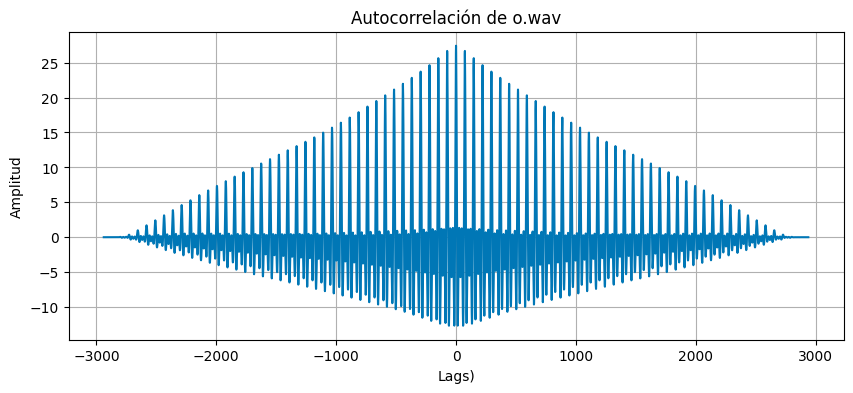

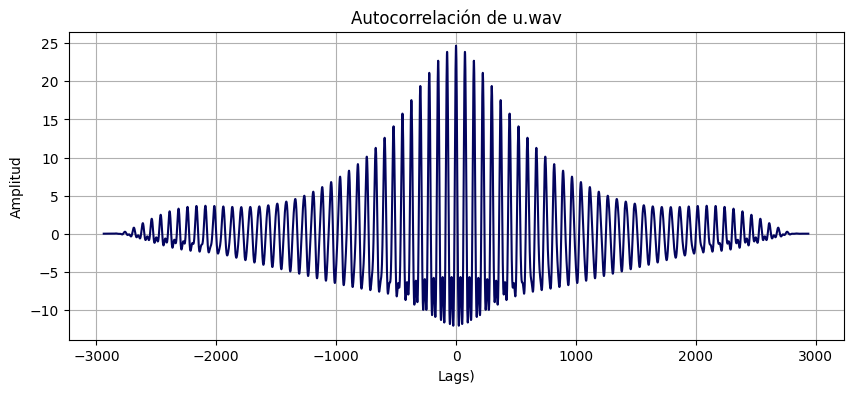

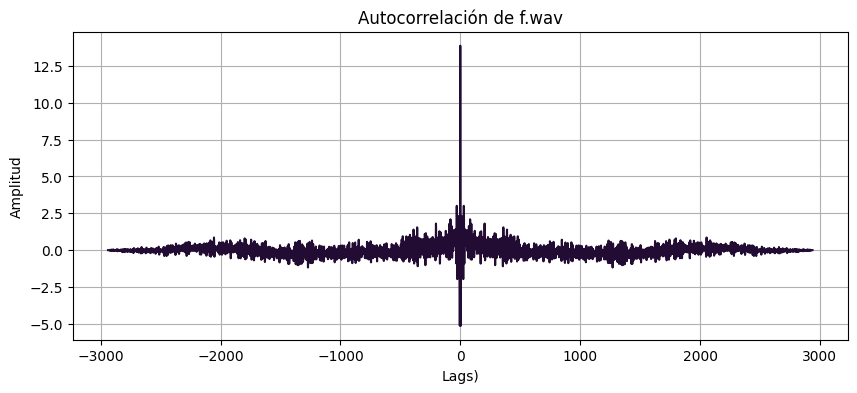

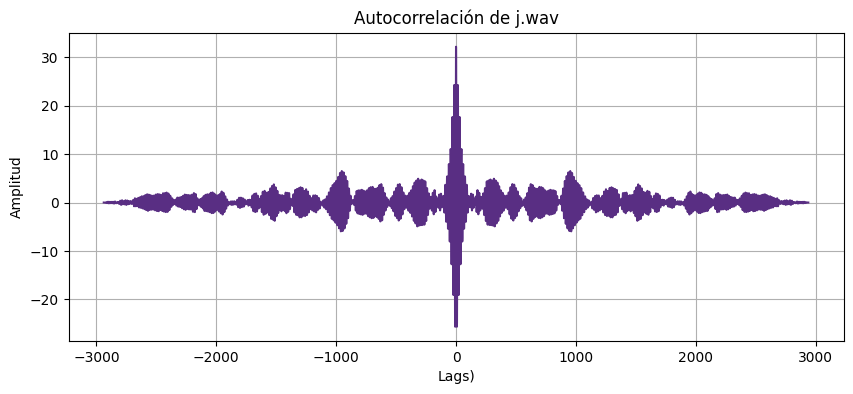

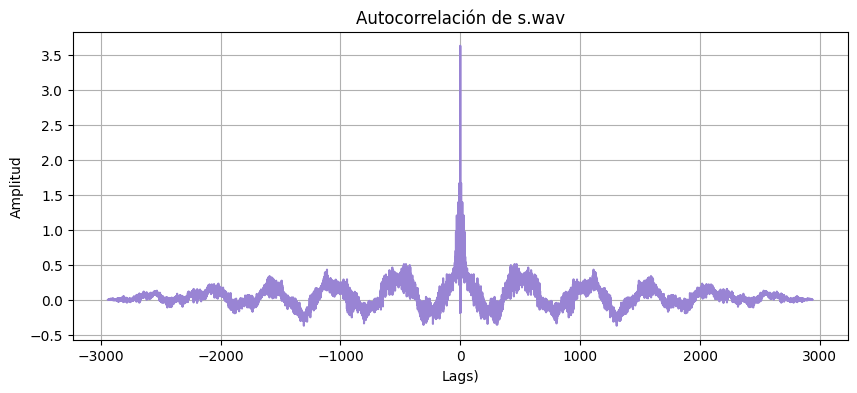

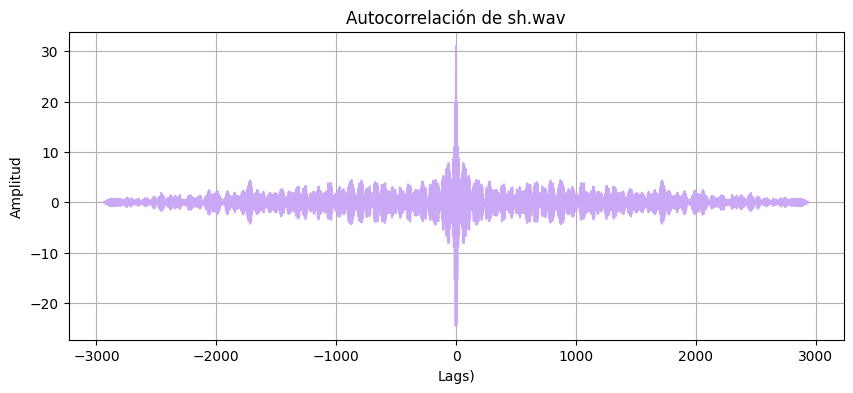

{'a': [0.0311], 'e': [0.0321], 'i': [0.0121], 'o': [0.0073], 'u': [0.00258], 's': [0.0251], 'sh': [0.0302], 'f': [0.0453], 'j': [0.0245]} {'a': [1.1835, -0.5685, 0.3874, 0.2939, -0.9807, 0.587, -0.2441, -0.0866, 0.4763, -0.0491, -0.1137, 0.0601, -0.4138, 0.2613, 0.1998, -0.0327, 0.0894, -0.195, -0.0695, 0.01], 'e': [0.3876, -0.8134, 1.126, 0.3371, 0.7794, 0.413, -0.6026, -0.4977, -0.9342, -0.3311, -0.0233, 0.3248, 0.388, 0.4025, 0.0977, -0.0062, -0.0465, -0.1614, -0.0132, -0.1101], 'i': [-0.2189, -0.6421, 1.3317, 1.3899, 1.6527, 0.3503, -1.0505, -1.8235, -1.6228, -0.5322, 0.3435, 0.9051, 0.7906, 0.3556, 0.2841, -0.164, 0.084, -0.2809, -0.0976, -0.1635], 'o': [1.2328, -0.6982, 1.4335, -0.4589, 0.3123, -1.1168, -0.6169, -0.1906, 0.5552, 0.5243, 0.8605, -0.0488, -0.3003, -0.855, -0.1109, -0.0894, 0.5002, 0.0034, 0.3986, -0.386], 'u': [0.735, 0.3731, 0.5123, 1.0994, -1.1137, -1.1504, -0.3682, -0.3828, 0.7703, 0.8673, 0.2769, -0.198, -0.1659, -0.3783, -0.1847, 0.1825, 0.1184, -0.0033, 0.123

In [53]:
def graficar_autocorrelacion(autocorr, color, nombre, lags):

    plt.figure(figsize=(10, 4))
    plt.plot(lags, autocorr, color=color)
    plt.title(f"Autocorrelación de {nombre}")
    plt.xlabel('Lags)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

for i, vocal in enumerate(vocales):
    graficar_autocorrelacion(autocorrelaciones[i], colores1[i], vocal, lags_var[i])
for i, consonante in enumerate(consonantes):
    graficar_autocorrelacion(autocorrelaciones[i + len(vocales)], colores3[i], consonante, lags_var[i + len(vocales)])

print(coef_b, coef_a)

# B

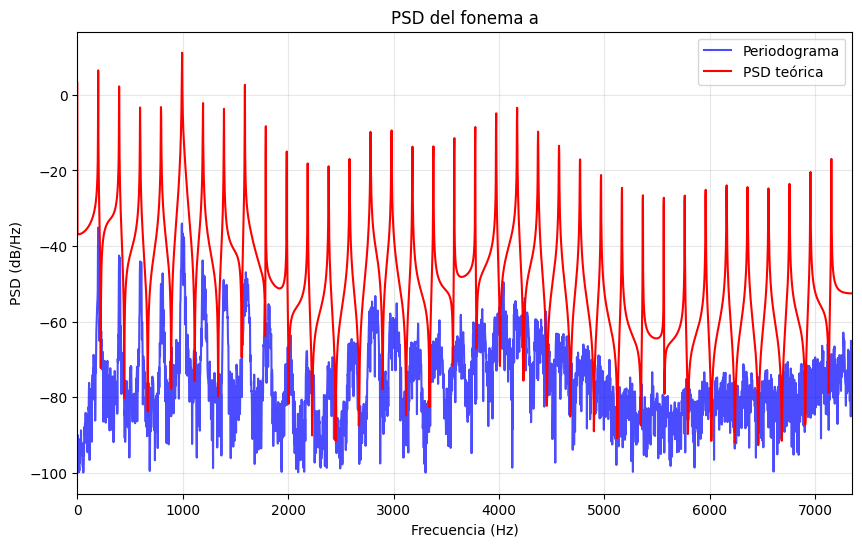

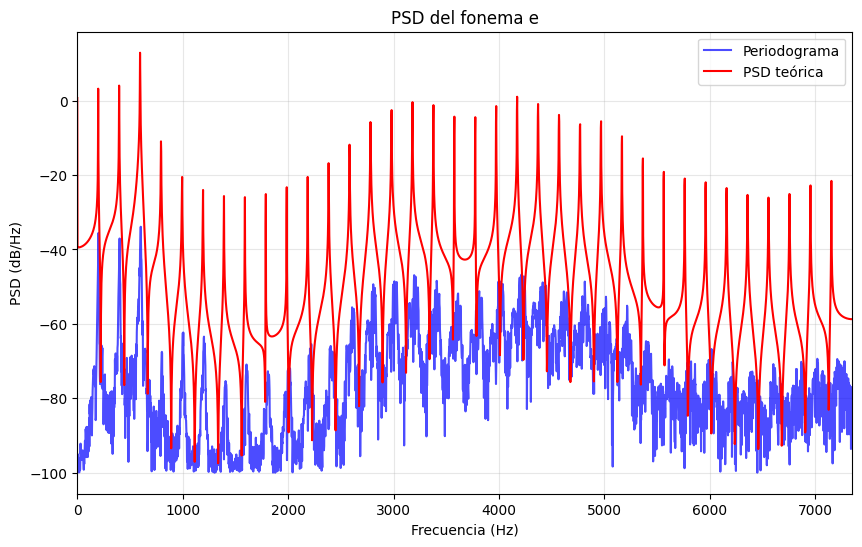

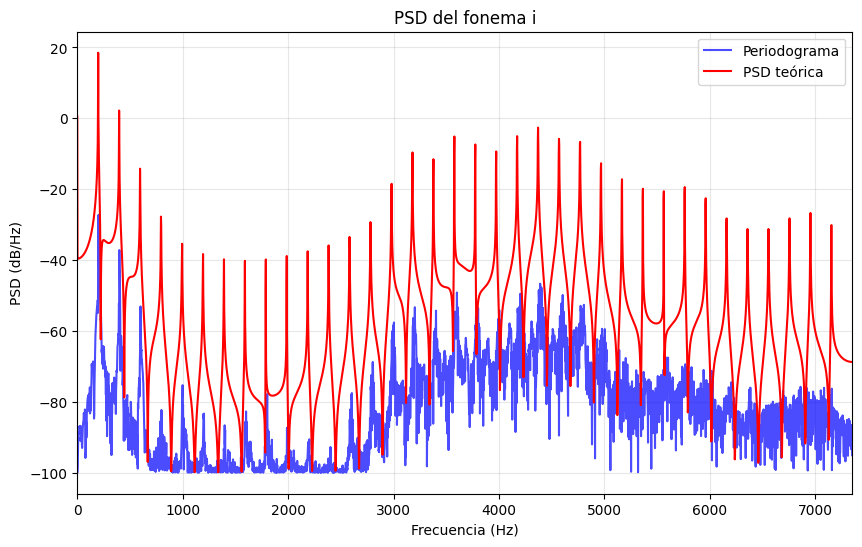

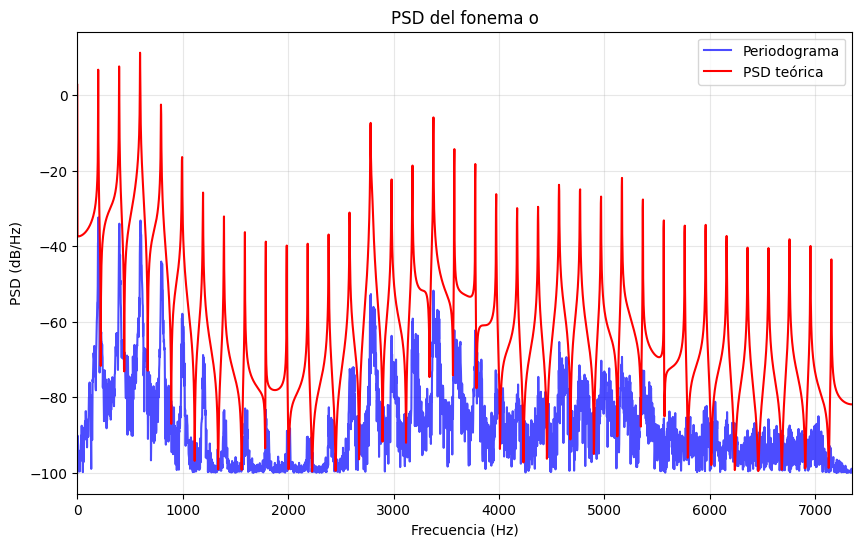

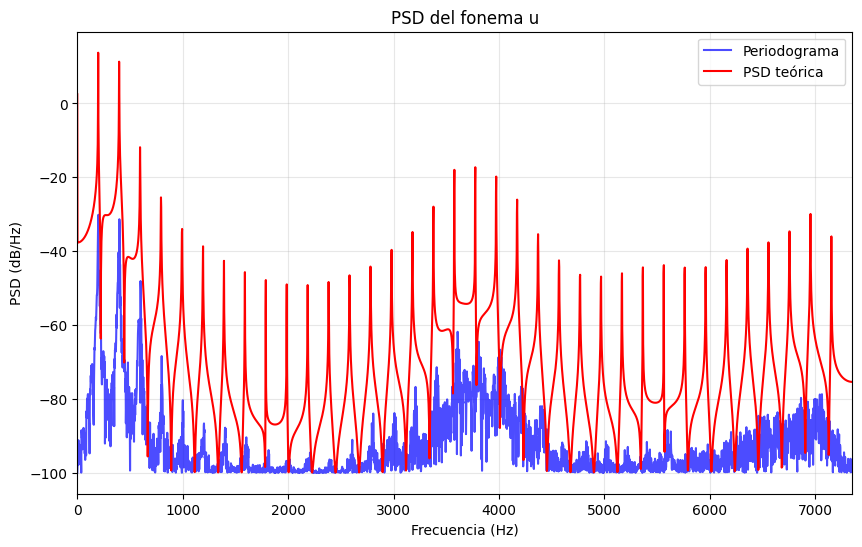

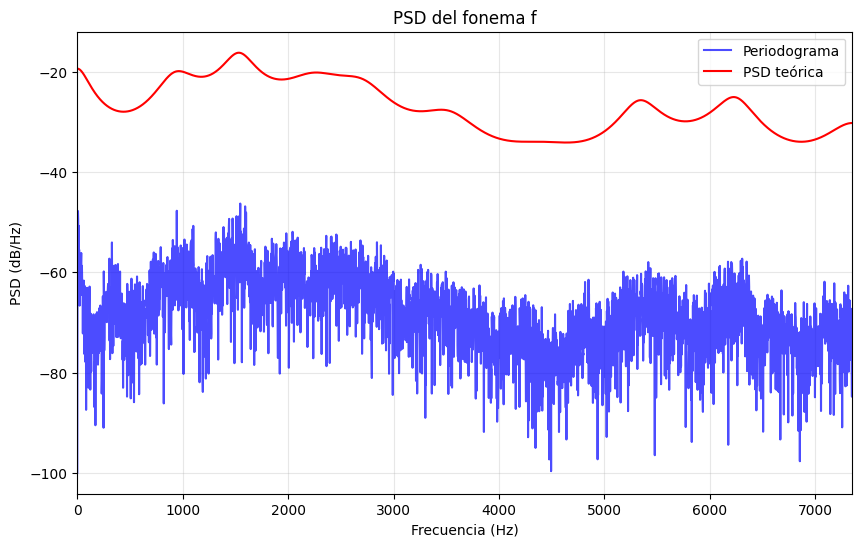

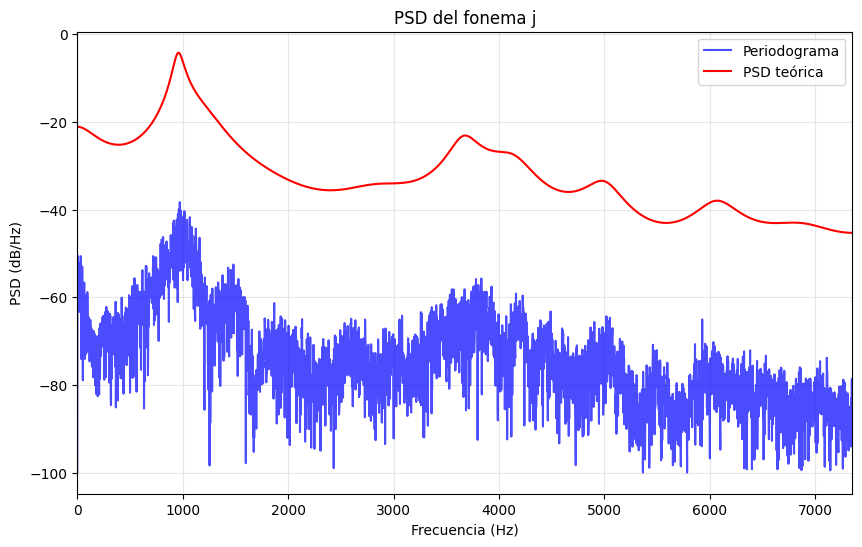

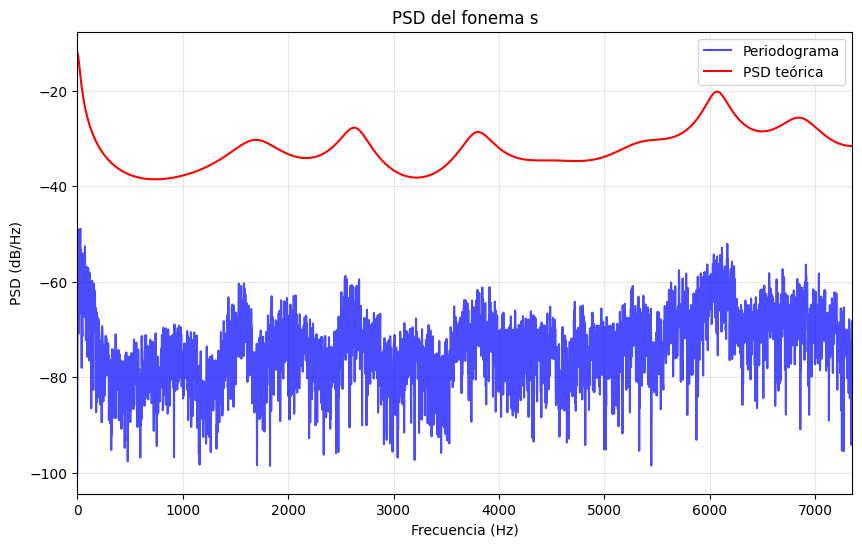

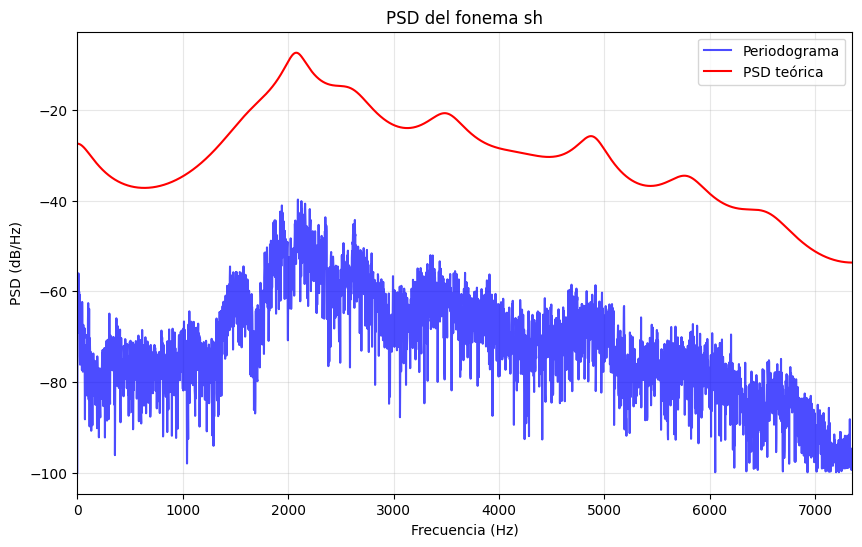

In [54]:
fonemas = ['a','e','i','o','u','f','j','s','sh']

for i, audio in enumerate(audios):
    fonema = fonemas[i]
    
    # Cálculo del periodograma
    f, period = signal.periodogram(audio, frec)
    
    # Obtener las frecuencias hasta fs/2
    max_idx = len(f) // 2  # Asegurar que solo tenemos hasta fs/2

    
    # Formato correcto para los coeficientes AR
    b = coef_b[fonema]
    a = [1.0] + [-x for x in coef_a[fonema]]  # Formato correcto para freqz
    
    # Calcular respuesta en frecuencia con la misma cantidad de puntos
    w, H = signal.freqz(b, a, worN=len(f), fs=frec)
    psd_teo = np.abs(H)**2
    
    # Para vocales, multiplicar por la PSD del tren de impulsos
    if fonema in ['a','e','i','o','u']:
        f0 = 200  # Frecuencia fundamental más típica para voz
        Su, f_pulsos = psd_pulsos(f0, len(f)*2, frec)
        
        # Interpolar la PSD del tren de impulsos para que coincida con nuestras frecuencias
        Su_interp = np.interp(f, f_pulsos[:len(f_pulsos)//2], Su[:len(f_pulsos)//2])
        psd_teo *= Su_interp
    
    # Convertir a decibeles
    period_db = 10 * np.log10(period + 1e-10)  
    psd_teo_db = 10 * np.log10(psd_teo + 1e-10)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(f, period_db, 'b', alpha=0.7, label='Periodograma')
    plt.plot(f, psd_teo_db, 'r', label='PSD teórica')
    
    plt.title(f"PSD del fonema {fonema}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("PSD (dB/Hz)")
    plt.xlim(0, frec/2)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# ejercicio 2
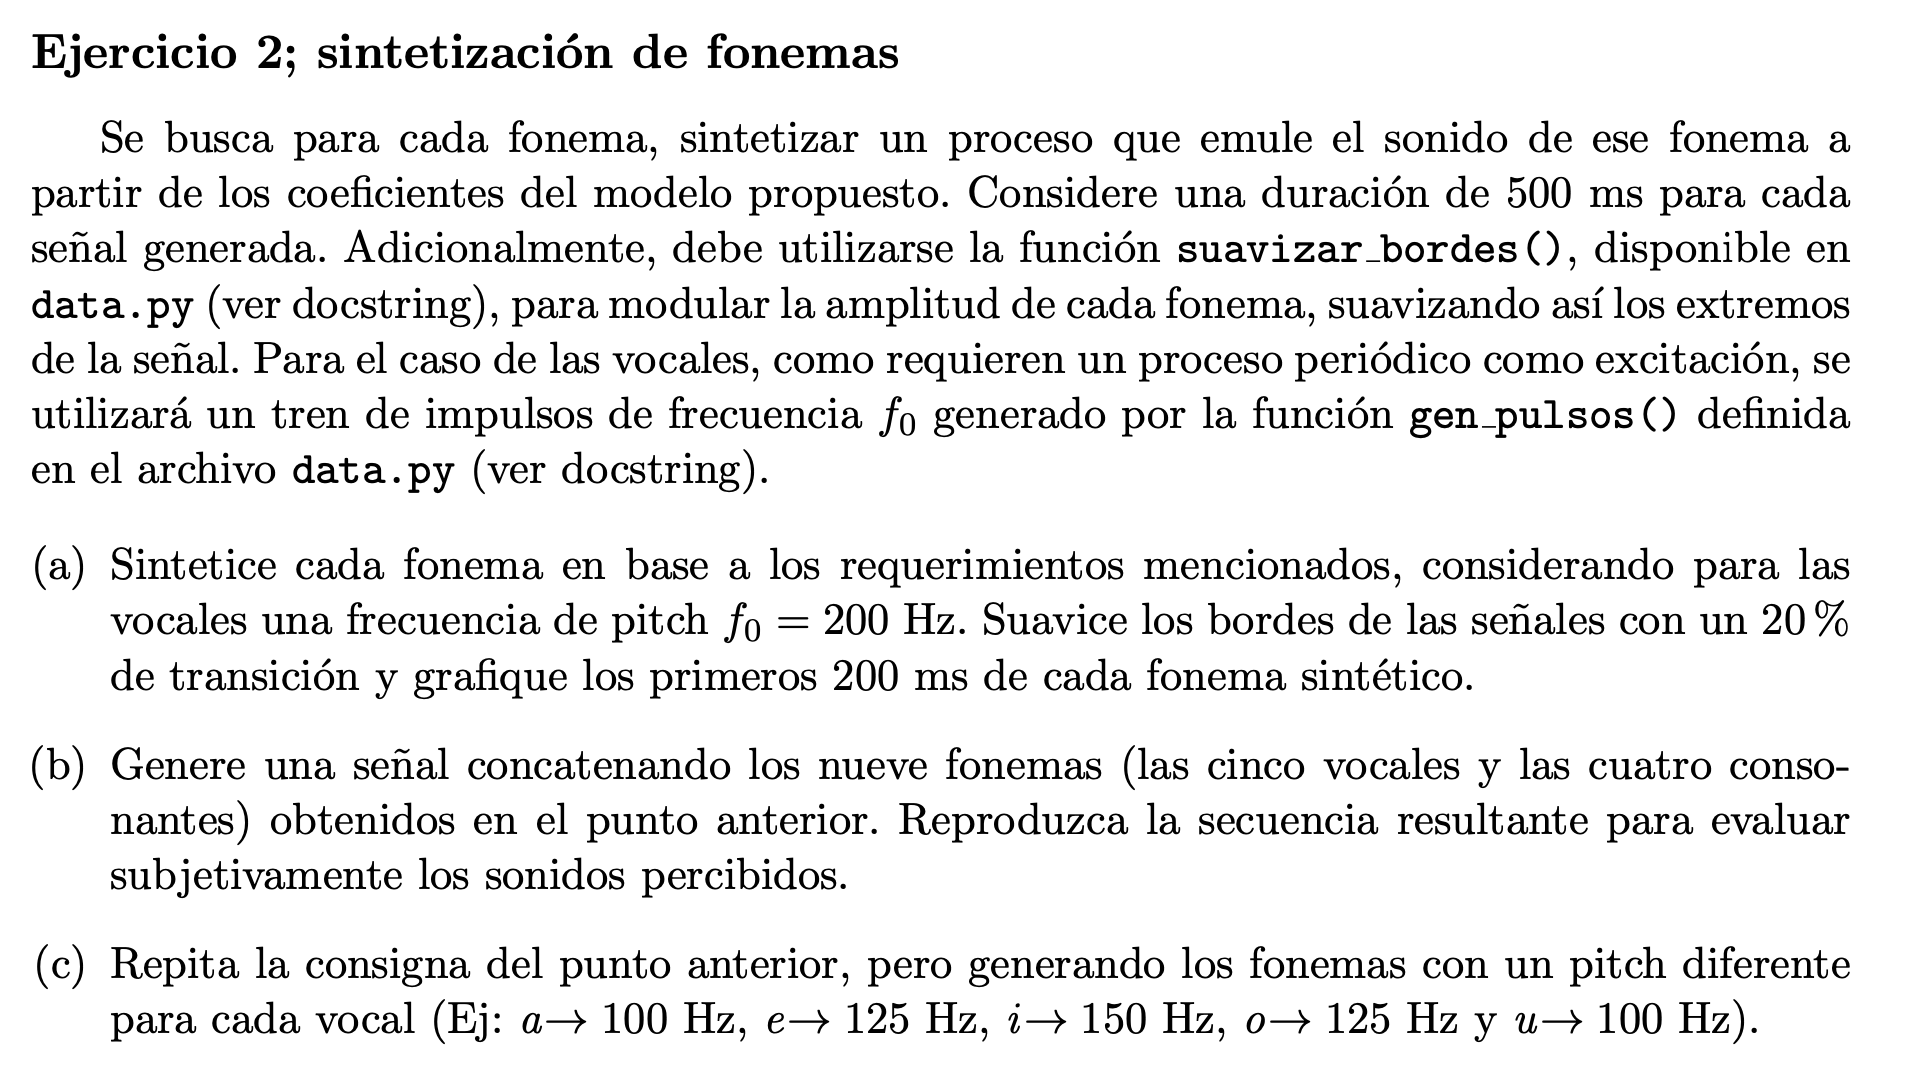

# A


In [79]:
duracion = 0.5 #ms
impulsos = []
f0 = 200

def sintetizar_fonema(fonema, pitch=200):
    if fonema in ['a','e','i','o','u']:
        impulso = gen_pulsos(pitch, int(duracion*frec), frec)
    else:
        impulso = stats.norm.rvs(size=int(duracion*frec))

    sintetizao = lfilter(coef_b[fonema], [1.0] + [-x for x in coef_a[fonema]], impulso)
    suavizao = suavizar_bordes(sintetizao, fade=0.2)

    return suavizao

sintetizaos = [sintetizar_fonema(fonema) for fonema in fonemas]


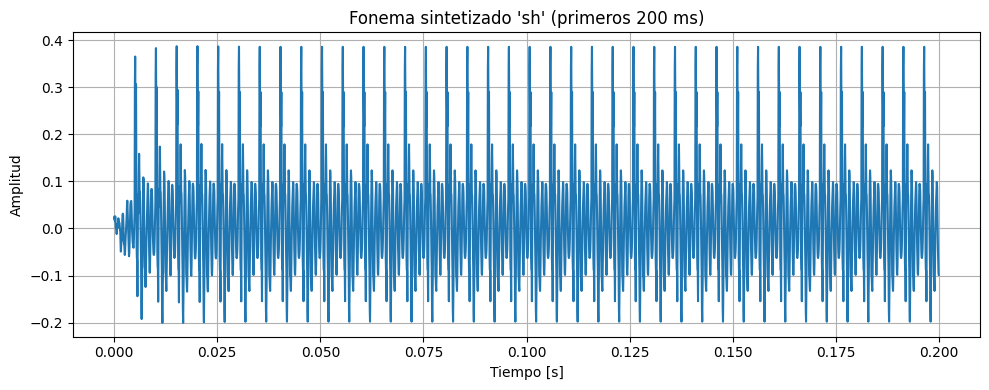

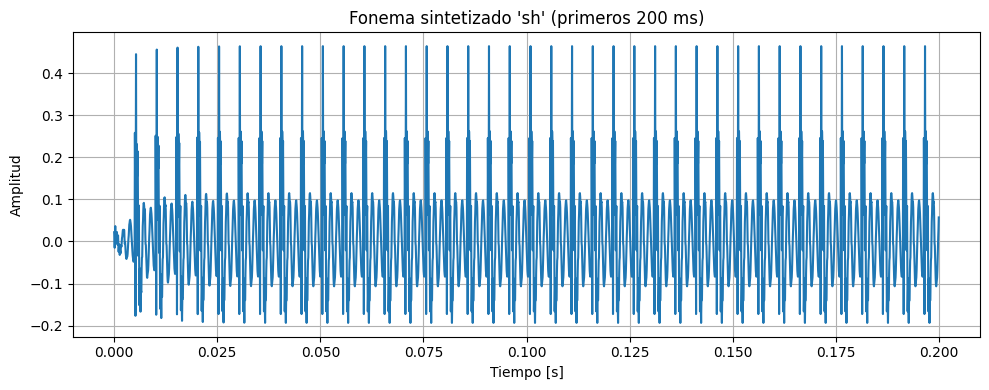

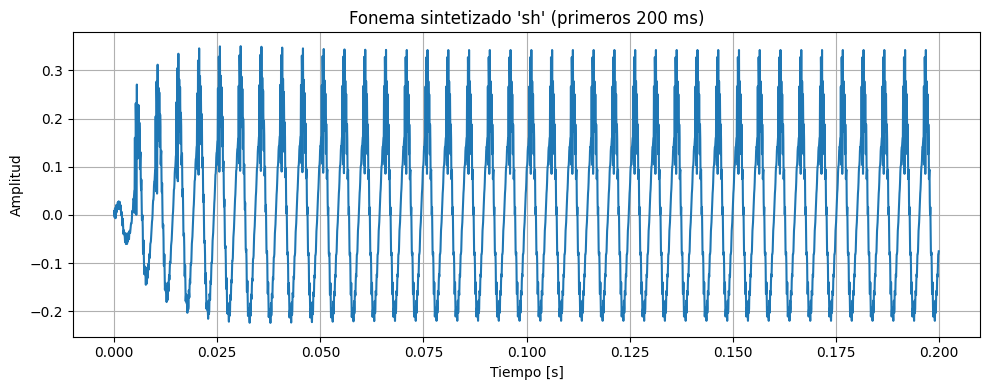

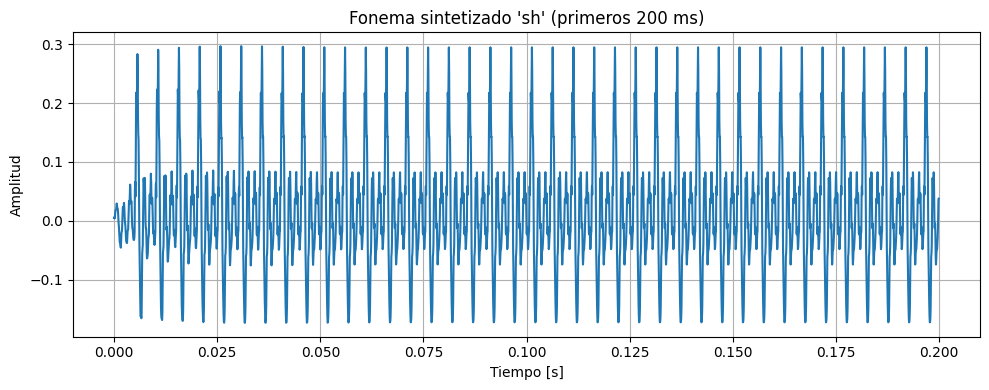

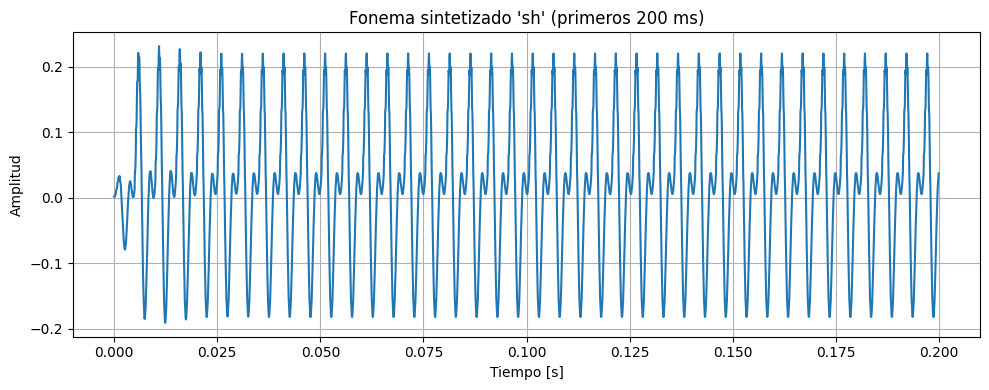

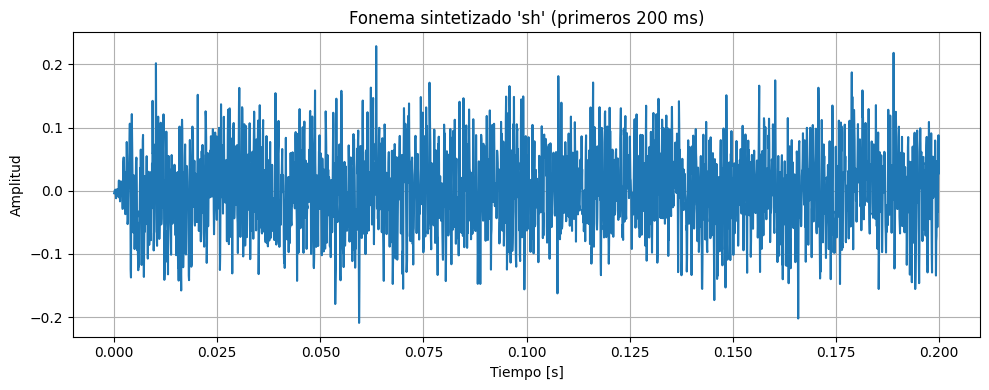

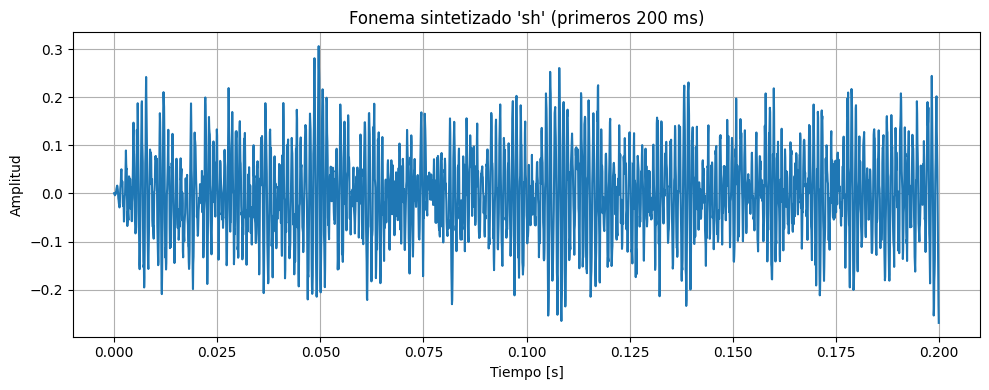

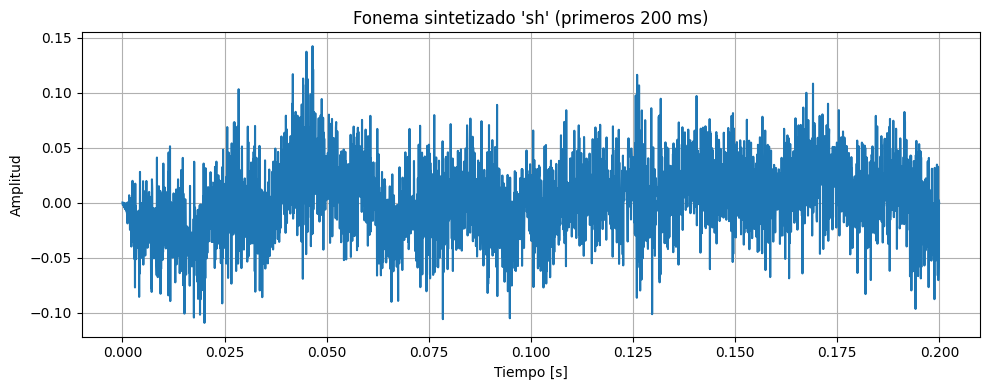

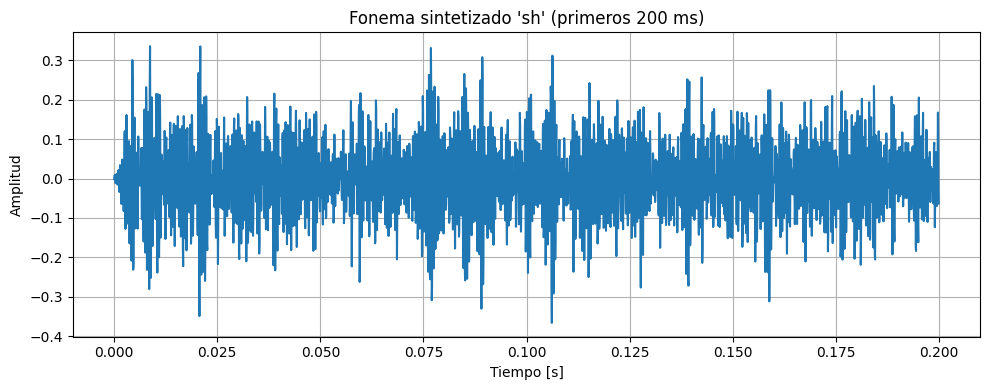

In [78]:
for s in sintetizaos:
    t = np.arange(int(0.2*frec)) / frec
    plt.figure(figsize=(10, 4))
    plt.plot(t, s[:int(0.2*frec)])
    plt.title(f"Fonema sintetizado '{fonema}' (primeros 200 ms)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.tight_layout()
    plt.show()